# Porto Seguro's Safe Drive Prediction

Dans le cadre de ce projet, nous nous concentrerons sur la compétition Kaggle intitulée "Porto Seguro's Safe Drive Prediction". L'objectif de cette compétition est de prédire le coût d'un sinistre en fonction des caractéristiques des assurés.

Le défi posé par cette compétition est de grande importance, car il vise à améliorer la capacité des compagnies d'assurance à évaluer et prévoir les risques liés à la conduite automobile. En utilisant des techniques avancées de science des données et de modélisation statistique, nous tenterons de créer un modèle précis qui permettra de prédire les coûts des sinistres en se basant sur un ensemble de variables pertinentes.

Pour mener à bien ce projet, nous suivrons une méthodologie rigoureuse qui comprendra les étapes suivantes :

* Exploration des données : Nous allons examiner attentivement les données fournies par Kaggle, comprendre les caractéristiques disponibles, identifier les éventuelles valeurs manquantes ou aberrantes, et explorer les relations entre les différentes variables.

* Prétraitement des données : Avant de construire notre modèle, nous allons nettoyer et préparer les données. Cela impliquera la gestion des valeurs manquantes, l'encodage des variables catégorielles, la normalisation des données numériques, etc.

* Sélection des caractéristiques : Nous évaluerons l'importance de chaque caractéristique pour la prédiction du coût du sinistre et sélectionnerons les variables les plus pertinentes pour construire notre modèle.

* Construction du modèle : Nous utiliserons différentes techniques de modélisation telles que la régression, les forêts aléatoires, ou les réseaux de neurones, pour construire un modèle capable de prédire avec précision le coût du sinistre.

* Optimisation du modèle : Une fois que nous aurons un premier modèle, nous chercherons à l'optimiser en ajustant les hyperparamètres et en utilisant des techniques d'optimisation pour améliorer ses performances.

* Validation croisée : Pour évaluer la robustesse de notre modèle, nous utiliserons des méthodes de validation croisée pour mesurer sa capacité à généraliser sur de nouvelles données.

* Prédiction des sinistres : Enfin, nous utiliserons notre modèle optimisé pour faire des prédictions sur les données de test fournies par Kaggle, afin de déterminer sa précision dans un environnement réel.

Ce projet offre une excellente opportunité d'apprendre et de mettre en pratique les compétences en science des données et en apprentissage automatique. En travaillant ensemble et en suivant une approche méthodique, nous pouvons espérer obtenir des résultats significatifs dans la compétition Kaggle "Porto Seguro's Safe Drive Prediction".

### Importation des bibliothèques
Pour commencer notre projet, nous allons importer toutes les bibliothèques nécessaires tout au long de notre notebook. Cela nous permettra de disposer des outils essentiels pour explorer la base de données, effectuer des visualisations et réaliser l'apprentissage de nos modèles.

Nous allons importer les bibliothèques suivantes :

* Pandas : Pandas est une bibliothèque incontournable pour la manipulation et l'analyse de données tabulaires. Elle nous permettra d'importer, de nettoyer et de préparer nos données.

* Matplotlib et Seaborn : Ces bibliothèques sont dédiées à la visualisation des données. Matplotlib offre une grande flexibilité pour créer des graphiques personnalisés, tandis que Seaborn facilite la création de visualisations esthétiquement plaisantes et informatives.

* Scikit-learn : Scikit-learn est une bibliothèque très populaire pour l'apprentissage automatique (machine learning). Elle propose une large gamme d'algorithmes de modélisation et d'outils pour l'évaluation des performances des modèles.

* Numpy : Numpy est une bibliothèque essentielle pour les calculs scientifiques en Python. Elle permet de manipuler efficacement des tableaux multidimensionnels et d'effectuer des opérations mathématiques sur ces données.

* Autres bibliothèques spécifiques au besoin : Selon les exigences du projet, nous pourrions également importer des bibliothèques supplémentaires telles que XGBoost ou LightGBM pour des tâches d'apprentissage avancées.

Une fois que nous aurons importé ces bibliothèques, nous serons prêts à explorer la base de données, comprendre sa structure, visualiser les relations entre les variables et créer nos modèles d'apprentissage automatique. Cette étape initiale est cruciale car elle pose les bases solides de notre projet et facilite la mise en œuvre des différentes étapes de notre méthodologie.

In [1]:
import pandas as pd      # for data manipulation and analysis
import numpy as np       # for numerical computing
import matplotlib.pyplot as plt   
plt.style.use('ggplot')
# for data visualization
import matplotlib.dates as mdates   
import seaborn as sns    # for advanced data visualization
import random
import missingno as msno

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import plotly.graph_objs as go
import plotly.offline as py

from termcolor import colored
import pylab
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import optuna
import sklearn

import lightgbm as lgb

### 1. Informations sur les données

Les données sont présentées sous la forme traditionnelle de Kaggle, avec un fichier d'entraînement et un fichier de test : ../input/train.csv & ../input/test.csv.

Chaque ligne correspond à un assuré spécifique et les colonnes décrivent leurs caractéristiques. La variable cible est nommée commodément "target" ici et indique si cet assuré a fait une réclamation d'assurance dans le passé.

Dans les données d'entraînement et de test, les caractéristiques appartenant à des groupes similaires sont étiquetées en conséquence dans les noms des caractéristiques (par exemple, ind, reg, car, calc). De plus, les noms des caractéristiques incluent le suffixe bin pour indiquer les caractéristiques binaires et cat pour indiquer les caractéristiques catégorielles. Les caractéristiques sans ces désignations sont soit continues, soit ordinales. Les valeurs de -1 indiquent que la caractéristique était absente lors de l'observation. La colonne cible indique si une réclamation a été déposée ou non pour cet assuré.

### 2. Import Data

In [2]:
# Read the CSV file into a Pandas DataFrame
#train = pd.read_csv('../input/porto-seguro-safe-driver-prediction/train.csv')
#test = pd.read_csv('../input/porto-seguro-safe-driver-prediction/test.csv')

train = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/train.csv')
test = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/test.csv')

### 3. Aperçu des données

In [3]:
print('SHAPE')
print(train.shape)
print('\n INFO')
print(train.info())
print('\n NULL VALUES')
print(train.isnull().sum())
print('\n HEAD')
print(train.head())
print('\n DESCRIBE')
print(train.describe())

SHAPE
(595212, 59)

 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-nul

In [4]:
print('SHAPE')
print(test.shape)
print('\n INFO')
print(test.info())
print('\n NULL VALUES')
print(test.isnull().sum())
print('\n HEAD')
print(test.head())
print('\n DESCRIBE')
print(test.describe())

SHAPE
(892816, 58)

 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              892816 non-null  int64  
 1   ps_ind_01       892816 non-null  int64  
 2   ps_ind_02_cat   892816 non-null  int64  
 3   ps_ind_03       892816 non-null  int64  
 4   ps_ind_04_cat   892816 non-null  int64  
 5   ps_ind_05_cat   892816 non-null  int64  
 6   ps_ind_06_bin   892816 non-null  int64  
 7   ps_ind_07_bin   892816 non-null  int64  
 8   ps_ind_08_bin   892816 non-null  int64  
 9   ps_ind_09_bin   892816 non-null  int64  
 10  ps_ind_10_bin   892816 non-null  int64  
 11  ps_ind_11_bin   892816 non-null  int64  
 12  ps_ind_12_bin   892816 non-null  int64  
 13  ps_ind_13_bin   892816 non-null  int64  
 14  ps_ind_14       892816 non-null  int64  
 15  ps_ind_15       892816 non-null  int64  
 16  ps_ind_16_bin   892816 non-nul

Chaque ligne dans ces fichiers représente un assuré spécifique, et les colonnes décrivent différentes caractéristiques associées à ces assurés. Voici un aperçu des principales caractéristiques :

- target : La variable cible indiquant si l'assuré a déposé une réclamation d'assurance (1) ou non (0).
- ind : Caractéristiques commençant par "ind" qui sont regroupées ensemble.
- reg : Caractéristiques commençant par "reg" qui sont regroupées ensemble.
- car : Caractéristiques commençant par "car" qui sont regroupées ensemble.
- calc : Caractéristiques commençant par "calc" qui sont regroupées ensemble.
- bin : Caractéristiques binaires qui prennent des valeurs 0 ou 1.
- cat : Caractéristiques catégorielles qui peuvent avoir plusieurs catégories distinctes.
- Valeurs de -1 : Ces valeurs indiquent que la caractéristique est manquante pour l'observation correspondante.

L'objectif de ce projet est de développer un modèle d'apprentissage automatique en utilisant les données d'entraînement afin de prédire avec précision si un assuré déposera ou non une réclamation d'assurance à partir des caractéristiques fournies.

Nous allons explorer plus en détail les données, effectuer une analyse approfondie, préparer les données pour la modélisation et utiliser divers algorithmes pour créer un modèle prédictif performant. Enfin, nous évaluerons les performances du modèle sur les données de test pour voir à quel point il est capable de généraliser sur de nouvelles observations.

#### Valeurs Nulles ou Manquantes

In [5]:
train.isnull().any().any()

False

Malgré le résultat affichant "False" pour les valeurs nulles, nous savons d'après l'explication de Porto Seguro que les valeurs de -1 indiquent que la caractéristique était manquante lors de l'observation.
Voyons quelles colonnes contiennent des valeurs de -1 :

In [6]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

Nous allons visualiser nous données et nous allons voir quelle variable a le plus de valuer manquante. 

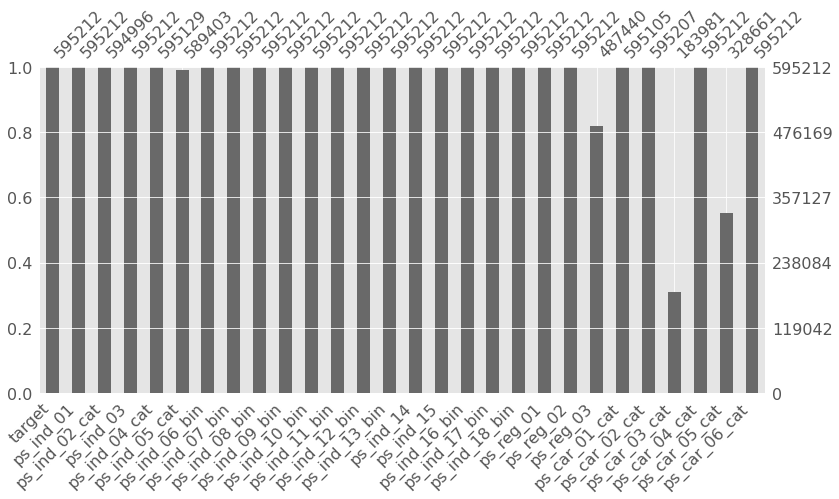

In [7]:
import missingno as msno
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13, 6));

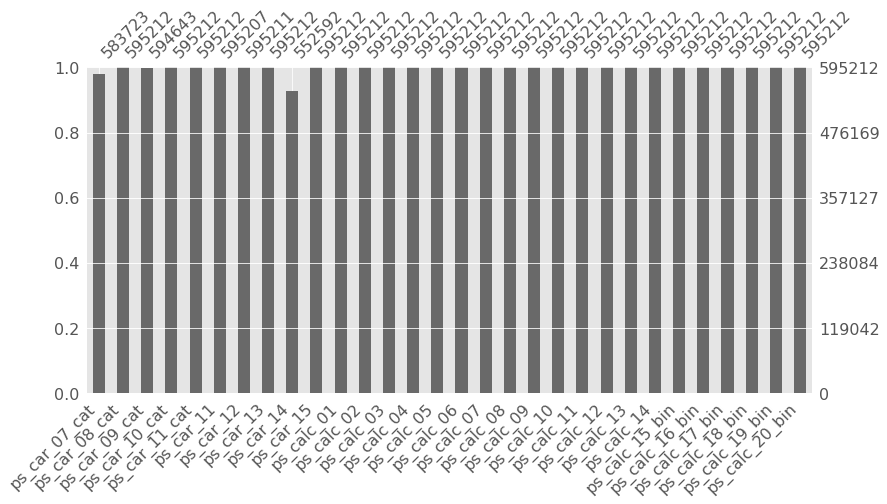

In [8]:
msno.bar(df=train_copy.iloc[:, 29:], figsize=(13, 6));

Les cartes thermiques ci-dessus démontrent en jaune que 7 caractéristiques sur 59 de l'ensemble de données d'entraînement contiennent des valeurs nulles :
* ps_ind_05_cat
* ps_reg_03
* ps_car_03_cat
* ps_car_05_cat
* ps_car_07_cat
* ps_car_14

La majorité des valeurs manquantes se trouvent dans les caractéristiques ps_reg_03, ps_car_03_cat et ps_car_05_cat, où plus de la moitié des données sont probablement manquantes.

Analyse :

Les variables ps_car_03_cat et ps_car_05_cat ont respectivement 69% et 45% de valeurs manquantes : en raison d'une proportion élevée de valeurs manquantes, elles seront supprimées.
Les autres données catégorielles seront conservées avec des valeurs manquantes -1.
- ps_reg_03 a 18% de valeurs manquantes : la moyenne sera utilisée pour combler les lacunes, car il s'agit de données continues.
- ps_car_14 a 7% de valeurs manquantes : la moyenne sera utilisée pour combler les lacunes, car il s'agit de données continues.
- ps_car_12 a 1 enregistrement manquant : la moyenne sera utilisée pour combler les lacunes, car il s'agit de données continues.
- ps_car_11 a 5 enregistrements avec des valeurs manquantes : le mode sera utilisé car il s'agit de données ordinales.

#### Suppression des variables ps_car_03_cat et ps_car_05_cat.

In [9]:
drop_cat_var = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(drop_cat_var, inplace=True, axis=1)
test.drop(drop_cat_var, inplace=True, axis=1)

#### Imputation avec la moyenne

Nous allons utiliser le mode de la variable catégoruielle pour comble les valeurs manquantes.

In [10]:
mean_imputer = SimpleImputer(missing_values=-1, strategy='mean')
train['ps_reg_03'] = mean_imputer.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imputer.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imputer.fit_transform(train[['ps_car_14']]).ravel()

#### Imputation avec le mode

Nous allons utiliser le mode de la variable catégoruielle pour comble les valeurs manquantes. 

In [11]:
mode_imputer = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_car_11'] = mode_imputer.fit_transform(train[['ps_car_11']]).ravel()

#### Inspection de la cible

Comme observé précédemment, la cible ne contient que deux valeurs, 0 et 1. Visualisons-les :

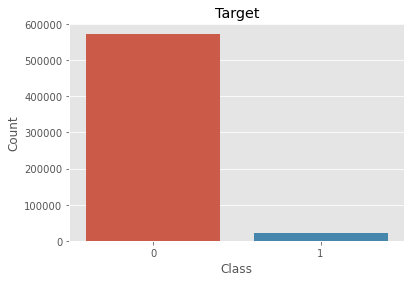

In [12]:
sns.countplot(x='target', data=train)
# Labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Target')

# Display the plot
plt.show()

On peut constater que notre variable cible est très déséquilibrée, avec une grande majorité de zéros et très peu de uns. Cette situation est courante dans le monde de l'assurance, où la plupart des individus n'ont pas de sinistres tandis que seulement quelques-uns en ont.On peut constater que nous avons un variable civ-ble qui est tres désiquilibré avec beaucoup de 0 et tres peu de un. cette situation est très présente dans le monde de l'assurance car nous avons beaucoup d'individus sans sinsitre et quelques individue ont des sinsitres. 

### 5. Correlation 

#### Type de données

Comme indiqué précédemment, l'ensemble de données est composé de données de type entier (integers) et réel (float). Séparons-les pour obtenir la corrélation entre les variables :

#### Float features

In [13]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

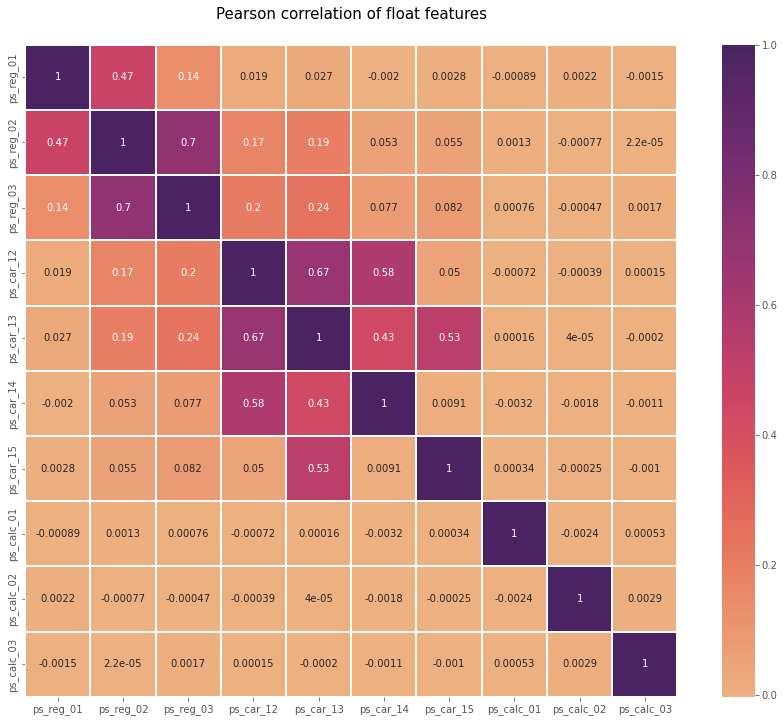

In [14]:
colormap = "flare"
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of float features', y=1.03, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True);



Analyse :

La plupart des caractéristiques présentent une corrélation proche de zéro ou aucune corrélation entre elles. Les seules qui montrent une corrélation linéaire positive sont les suivantes :

* ps_reg_01 et ps_reg_02
* ps_reg_01 et ps_reg_03
* ps_reg_02 et ps_reg_03
* ps_car_12 et ps_car_13
* ps_car_13 et ps_car_15

#### Integer features

Étant donné que le nombre de caractéristiques entières est beaucoup plus élevé que celui des caractéristiques réelles, la heatmap rendra impossible la lecture des corrélations à l'intérieur de chaque carré. C'est pourquoi la heatmap interactive a été choisie.

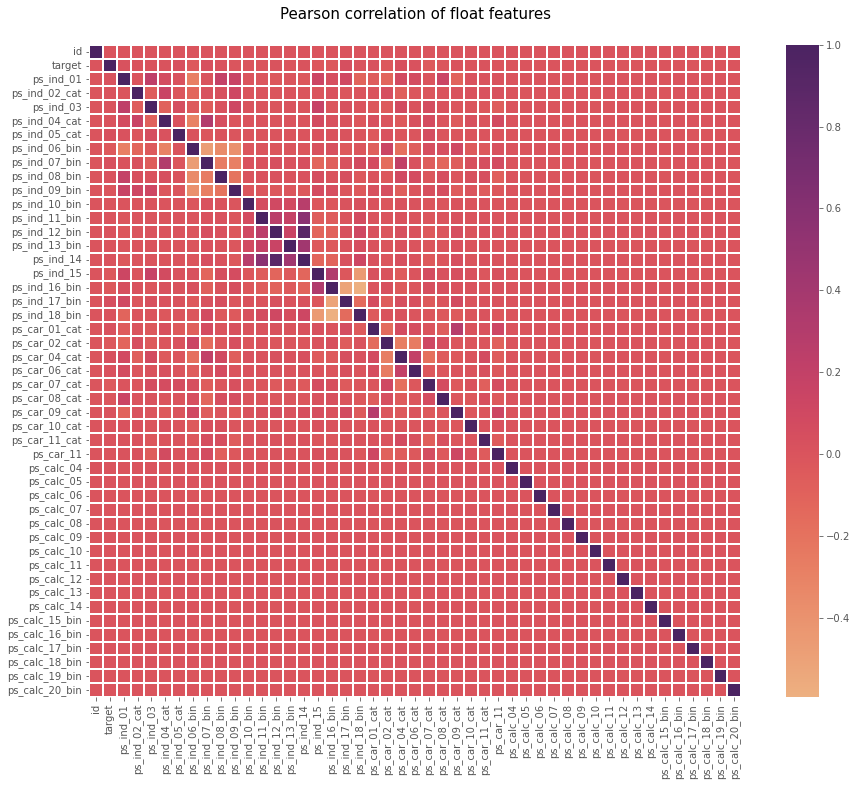

In [15]:
colormap = "flare"
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of float features', y=1.03, size=15)
sns.heatmap(train_int.corr(),linewidths=0.1, vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=False);

Analyse :

Comme précédemment, la plupart des caractéristiques présentent une corrélation linéaire proche de zéro ou aucune corrélation entre elles. Dans cette heatmap, nous pouvons également observer certaines caractéristiques ayant une corrélation négative :

ps_ind_07_bin
ps_ind_06_bin
ps_ind_16_bin
ps_ind_17_bin
ps_ind_18_bin
La corrélation positive la plus élevée à noter est entre :

ps_ind_14 / ps_ind_12_bin : z = 0.89
ps_ind_14 / ps_ind_11_bin : z = 0.56
Une corrélation intéressante à noter est entre ps_car_03_cat / ps_car_05_cat (z = 0.489). Les deux variables contiennent la plupart de leurs valeurs manquantes, ce qui pourrait expliquer la corrélation raisonnable entre elles.

#### Analyse des caractéristiques binaires

Les caractéristiques binaires, qui n'ont que deux valeurs possibles (par exemple, 0 et 1, Vrai et Faux), peuvent fournir des informations précieuses et jouer un rôle significatif dans une analyse de données ou un projet d'apprentissage automatique.

In [16]:
# List of binary columns
bin_col = [col for col in train.columns if '_bin' in col]

# Create lists to store the count of zeros and ones
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [17]:
# Create go.Bar for each list
bar_zero = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
bar_one = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

# Create the layout
data = [bar_zero, bar_one]
layout = go.Layout(
    barmode='stack',
    title='Count binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='binary-stacked-bar')
#plt.savefig('graph/binary-stacked-bar.png') # used only in local jupiter notebook

Analyse :

Nous pouvons observer que certaines caractéristiques sont principalement composées de 0, telles que :

- ps_ind_10_bin
- ps_ind_11_bin
- ps_ind_12_bin
- ps_ind_13_bin

Cette observation complète l'analyse précédente basée sur l'information mutuelle, indiquant que ces caractéristiques pourraient ne pas être utiles car ce sont les moins pertinentes pour un problème de classification. 

In [18]:
train.drop(["ps_ind_10_bin", "ps_ind_11_bin", "ps_ind_12_bin", "ps_ind_13_bin"], inplace=True, axis=1)

test.drop(["ps_ind_10_bin", "ps_ind_11_bin", "ps_ind_12_bin", "ps_ind_13_bin"], inplace=True, axis=1)

### Modèles de Machine learning

Nous allons tester plusieurs modèles, en commençant par le plus simple qui consiste à utiliser une régression logistique classique. Ensuite, nous évaluerons le Random Forest, le Gradient Boosting et le Lightgbm.

Pour chacun de ces modèles, nous mettrons en place un système de validation croisée en divisant notre ensemble d'apprentissage en ensemble d'entraînement et ensemble de validation. Nous entraînerons nos modèles sur l'ensemble d'entraînement et les évaluerons sur l'ensemble de validation. Cette expérience sera répétée plusieurs fois, et nous prendrons la moyenne des résultats sur chaque ensemble de validation.

Nous serons particulièrement attentifs au sur-apprentissage pour chaque algorithme et nous appliquerons une régularisation importante pour l'empêcher.

Nous allons également effectuer une recherche de grille (grid search) pour chaque modèle en utilisant la validation croisée (cross-validation).

- Recherche de grille (Grid Search) :

La recherche de grille est une technique utilisée pour sélectionner les meilleurs hyperparamètres d'un algorithme d'apprentissage automatique. Les hyperparamètres sont les paramètres que nous devons définir avant de lancer l'apprentissage du modèle, et ils influencent la performance et la complexité du modèle. Par exemple, dans un modèle de régression logistique, l'hyperparamètre peut être le taux d'apprentissage ou la régularisation.
La recherche de grille consiste à définir une "grille" de valeurs possibles pour chaque hyperparamètre. Ensuite, nous testons toutes les combinaisons possibles de ces valeurs pour trouver la combinaison qui donne la meilleure performance du modèle. Pour chaque combinaison d'hyperparamètres, nous entraînons le modèle et l'évaluons sur un ensemble de validation.

- Validation croisée (Cross-Validation) :

La validation croisée est une méthode d'évaluation des performances d'un modèle qui consiste à diviser l'ensemble de données en plusieurs parties, appelées "plis" (folds). L'idée est de s'assurer que le modèle est bien généralisable et qu'il ne surapprend pas aux données d'apprentissage.
Le processus de validation croisée se déroule comme suit :

1. Divisez l'ensemble de données en k plis.
2. Entraînez le modèle sur k-1 plis et évaluez-le sur le pli restant.
3. Répétez cette étape k fois, de manière à ce que chaque pli soit utilisé comme ensemble de validation une fois.
4. Calculez la moyenne des performances du modèle sur les k évaluations pour obtenir une estimation plus robuste de ses performances.

La validation croisée est particulièrement utile lorsque l'ensemble de données est limité, car elle permet d'obtenir une estimation plus fiable de la performance du modèle en utilisant toutes les données disponibles. En utilisant la validation croisée avec la recherche de grille, nous pouvons sélectionner les meilleurs hyperparamètres de manière plus robuste et éviter de biaiser notre choix en fonction d'une seule division des données.


Pour classer nos modeles, nous allons utiliser l'AUC et la matrice e confusion.

1. AUC (Area Under the Curve) :
L'AUC (Area Under the Curve) est une mesure d'évaluation couramment utilisée en apprentissage automatique pour évaluer la performance d'un modèle de classification binaire. Cette mesure quantifie la capacité d'un modèle à distinguer entre les classes positives et négatives.

Dans le contexte de la courbe ROC (Receiver Operating Characteristic), l'AUC représente la surface sous la courbe ROC. La courbe ROC est un graphique qui représente le taux de vrais positifs (True Positive Rate - TPR) en fonction du taux de faux positifs (False Positive Rate - FPR) pour différents seuils de classification. Un modèle idéal aurait un AUC de 1, indiquant qu'il a une capacité parfaite à distinguer les classes positives et négatives. Un modèle qui prédit aléatoirement aurait un AUC de 0.5, car sa courbe ROC serait une ligne droite diagonale.

2. Matrice de confusion :
La matrice de confusion est une table qui permet d'évaluer les performances d'un modèle de classification en comparant les prédictions du modèle aux valeurs réelles de la classe cible.

Elle est généralement de forme 2x2 pour un problème de classification binaire et ressemble à ceci :

* Vrai positif (True Positive - TP) : le modèle prédit correctement une instance de la classe positive (la classe que l'on souhaite prédire).
* Faux positif (False Positive - FP) : le modèle prédit à tort une instance de la classe positive.
* Faux négatif (False Negative - FN) : le modèle prédit à tort une instance de la classe négative (la classe que l'on ne souhaite pas prédire).
* Vrai négatif (True Negative - TN) : le modèle prédit correctement une instance de la classe négative.

La matrice de confusion permet de calculer différentes métriques d'évaluation du modèle, telles que la précision, le rappel, le F-score, etc. Elle offre une vue globale des performances du modèle en mettant en évidence les erreurs de classification effectuées par celui-ci.

#### One hot Encodding 

In [19]:
cat_features = [feat for feat in train.columns if "_cat" in feat]

In [20]:
train = pd.get_dummies(train, columns=cat_features)
test = pd.get_dummies(test, columns=cat_features)

In [21]:
y_train = train['target']
X_train_ = train.drop(['target', 'id'], axis=1)
test = test.drop(['id'], inplace=True, axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train_, y_train, test_size=0.20, random_state=42)

### La régression logistique

Le premier modèle est un modèle paramétrique utilisé pour la classification binaire.

Avantages: 
- Facile à mettre en œuvre et à interpréter, tout en étant efficace lors de l'entraînement.
- Les paramètres prédits fournissent des informations sur l'importance de chaque caractéristique.
- Bonne performance sur des données à faible dimensionnalité.
- Très efficace lorsque l'ensemble de données a des caractéristiques qui sont linéairement séparables.
- Fournit des probabilités bien calibrées en plus des résultats de classification.

Inconvénients:
- Surapprentissage sur des données à haute dimensionnalité.
- Les problèmes non linéaires ne peuvent pas être résolus avec la régression logistique car elle a une surface de décision linéaire.
- Suppose une linéarité entre les variables dépendantes et indépendantes.
- N'arrive pas à capturer des relations complexes.
- Seules les caractéristiques importantes et pertinentes devraient être utilisées, sinon la valeur prédictive du modèle se dégradera.

In [23]:
param_grid = {
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"]
}
#clf_Logistic=LogisticRegression()
#logreg_cv=GridSearchCV(clf_Logistic, param_grid, cv=5, n_jobs=-1, verbose=2))
#logreg_cv.fit(X_train, y_train)
#logreg_cv.best_params_ 

#{'C': 1.0, 'penalty': 'l2'}

In [24]:
clf_Logistic = LogisticRegression(C= 1.0, penalty= 'l2').fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [25]:
y_pred__Logistic = clf_Logistic.predict(X_test)
y_pred__Logistic_proba = clf_Logistic.predict_proba(X_test)

In [26]:
cm__Logistic = confusion_matrix(y_test, y_pred__Logistic)
print('Confusion matrix\n\n', cm__Logistic)
print('\nTrue Positives(TP) = ', cm__Logistic[0,0])
print('\nTrue Negatives(TN) = ', cm__Logistic[1,1])
print('\nFalse Positives(FP) = ', cm__Logistic[0,1])
print('\nFalse Negatives(FN) = ', cm__Logistic[1,0])

Confusion matrix

 [[114658      0]
 [  4385      0]]

True Positives(TP) =  114658

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  4385


In [27]:
roc_auc_score(y_test, y_pred__Logistic_proba[:,1])

0.6283755131740453

#### Importance des variables. 

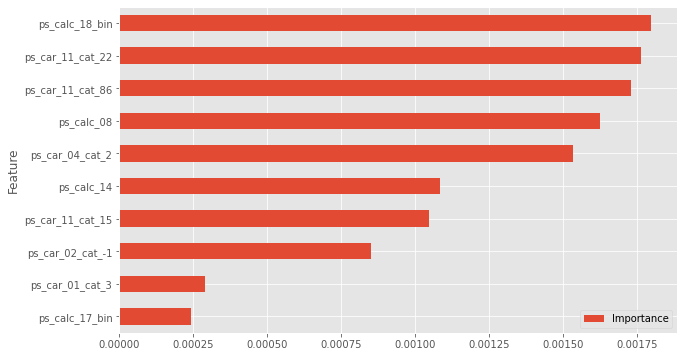

In [28]:
coefficients = clf_Logistic.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train_.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)[0:10]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));

Il est intéressant de noter que pour le modèle Regression logistique, les trois variables les plus importantes pour effectuer les prédictions sont les suivantes : ps_calc_18_bin, ps_car_11_cat_22 et ps_calc_04. 

### Classifier Random Forest

Avantages et inconvénients de l'algorithme Random Forest :

Les avantages de l'algorithme Random Forest sont les suivants :

* L'algorithme Random Forest peut être utilisé pour résoudre à la fois des problèmes de classification et de régression.
* Il est considéré comme un modèle très précis et robuste car il utilise un grand nombre d'arbres de décision pour effectuer des prédictions.
* Les forêts aléatoires prennent la moyenne de toutes les prédictions faites par les arbres de décision, ce qui annule les biais. Ainsi, il ne souffre pas du problème de surajustement (overfitting).
* Le classificateur Random Forest peut gérer les valeurs manquantes. Il existe deux façons de gérer les valeurs manquantes : utiliser les valeurs médianes pour remplacer les variables continues ou calculer la moyenne pondérée des proximités des valeurs manquantes.
* Le classificateur Random Forest peut être utilisé pour la sélection des caractéristiques. Cela signifie sélectionner les caractéristiques les plus importantes parmi celles disponibles dans l'ensemble de données d'entraînement.

Les inconvénients de l'algorithme Random Forest sont les suivants :

* Le plus grand inconvénient des forêts aléatoires est leur complexité computationnelle. Les forêts aléatoires sont très lentes pour effectuer des prédictions car un grand nombre d'arbres de décision est utilisé pour les prédictions. Tous les arbres de la forêt doivent faire une prédiction pour la même entrée, puis effectuer un vote. C'est donc un processus long.
* Le modèle est difficile à interpréter par rapport à un arbre de décision, où nous pouvons facilement faire une prédiction.

In [29]:
param_grid = { 
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
#clf_RF = RandomForestClassifier()

#%%time
#CV_rfc = GridSearchCV(estimator=clf_RF, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
#CV_rfc.fit(x_train, y_train)
#CV_rfc.best_params_ 


#{'criterion': 'entropy',
# 'max_depth': 8,
# 'max_features': 'auto',
# 'n_estimators': 200}

In [30]:
clf_RF = RandomForestClassifier(n_estimators=300, max_depth=7, 
                                criterion= 'entropy', max_features= 'auto').fit(X_train, y_train)

In [31]:
y_pred_RF = clf_RF.predict(X_test)
y_pred_RF_proba = clf_RF.predict_proba(X_test)

In [32]:
cm__RF = confusion_matrix(y_test, y_pred_RF)
print('Confusion matrix\n\n', cm__RF)
print('\nTrue Positives(TP) = ', cm__RF[0,0])
print('\nTrue Negatives(TN) = ', cm__RF[1,1])
print('\nFalse Positives(FP) = ', cm__RF[0,1])
print('\nFalse Negatives(FN) = ', cm__RF[1,0])

Confusion matrix

 [[114658      0]
 [  4385      0]]

True Positives(TP) =  114658

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  4385


In [33]:
roc_auc_score(y_test, y_pred_RF_proba[:,1])

0.6298385781975421

#### Importance des variables. 

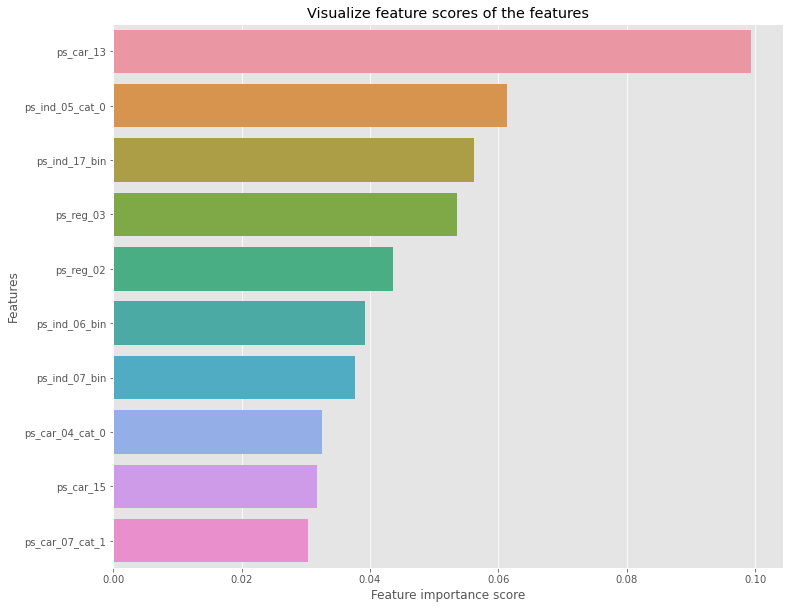

In [34]:
# view the feature scores
feature_scores = pd.Series(clf_RF.feature_importances_, index=X_train_.columns).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(x=feature_scores[0:10], y=feature_scores[0:10].index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores[0:10].index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

Il est intéressant de noter que pour le modèle Random Forest, les trois variables les plus importantes pour effectuer les prédictions sont les suivantes : ps_car_13, ps_ind_05_cat_0 et ps_ind_17_bin. 

### Classifier LightGBM

Les avantages de l'algorithme LightGBM sont les suivants :

* L'algorithme LightGBM est rapide et efficace en termes de vitesse d'entraînement et de prédiction. Il utilise des techniques de gradient boosting pour améliorer la vitesse de formation des arbres.
* Il peut gérer de grands ensembles de données et présente une grande évolutivité.
* LightGBM utilise des techniques de division basées sur l'histogramme, ce qui le rend plus adapté aux ensembles de données avec un grand nombre de fonctionnalités ou avec des valeurs manquantes.
* Il offre des performances de pointe et est généralement très précis dans ses prédictions.
* LightGBM permet de contrôler la complexité du modèle en ajustant des paramètres tels que la profondeur des arbres et le nombre d'itérations.


Les inconvénients de l'algorithme LightGBM sont les suivants :

* Comme les autres modèles basés sur le gradient boosting, LightGBM est sensible aux données bruitées et peut surajuster (overfit) sur des ensembles de données trop petits.
* Bien que LightGBM soit efficace en termes de mémoire, il peut quand même consommer plus de mémoire que des modèles linéaires plus simples.
* L'interprétation du modèle peut être plus complexe par rapport à des modèles linéaires ou des arbres de décision, car il s'agit d'un modèle basé sur des ensembles d'arbres de décision.
* En résumé, l'algorithme LightGBM est un excellent choix pour les ensembles de données volumineux, avec un grand nombre de fonctionnalités et nécessitant des prédictions rapides et précises. Cependant, il est important de prendre en compte le potentiel de surajustement et de sélectionner judicieusement les paramètres pour obtenir les meilleurs résultats.

In [35]:
param_grid = {
    'num_leaves': list(range(30, 150)),
    'learning_rate': [0.01,0.1,0.5],
    'min_child_samples': [20,50,100,200,500],
    'colsample_bytree': [0.6,0.8,1],
    "max_depth": [5, 8, 10],
    "n_estimators": [100, 300, 500]
}
lgbm = lgb.LGBMClassifier() # Shortname the LGBMClassifier()

#%%time
#lgbm_cv = GridSearchCV(lgbm, param_grid, cv=5, n_jobs=-1, verbose=2) #5 fold cross validation
#lgbm_cv.fit(X_train, y_train) #try all parameters
#lgbm_cv.best_params_ #print optimum parameters

#{'colsample_bytree': 0.8,
# 'learning_rate': 0.01,
# 'max_depth': 10,
# 'min_child_samples': 20,
# 'num_leaves': 30
#"n_estimators":500}

In [36]:
clf_LGBM = lgb.LGBMClassifier(min_child_samples = 20,
                            num_leaves = 30,
                            learning_rate=0.01, 
                            max_depth=10, 
                            n_estimators=500, 
                            colsample_bytree=0.8)
clf_LGBM.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=10,
               n_estimators=500, num_leaves=30)

In [37]:
# predict the results
y_pred_lightgbm=clf_LGBM.predict(X_test)
y_pred_lightgbm_proba=clf_LGBM.predict_proba(X_test)

In [38]:
cm = confusion_matrix(y_test, y_pred_lightgbm)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[114658      0]
 [  4385      0]]

True Positives(TP) =  114658

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  4385


In [39]:
roc_auc_score(y_test, y_pred_lightgbm_proba[:,1])

0.6412083584132896

#### Importance des variables. 

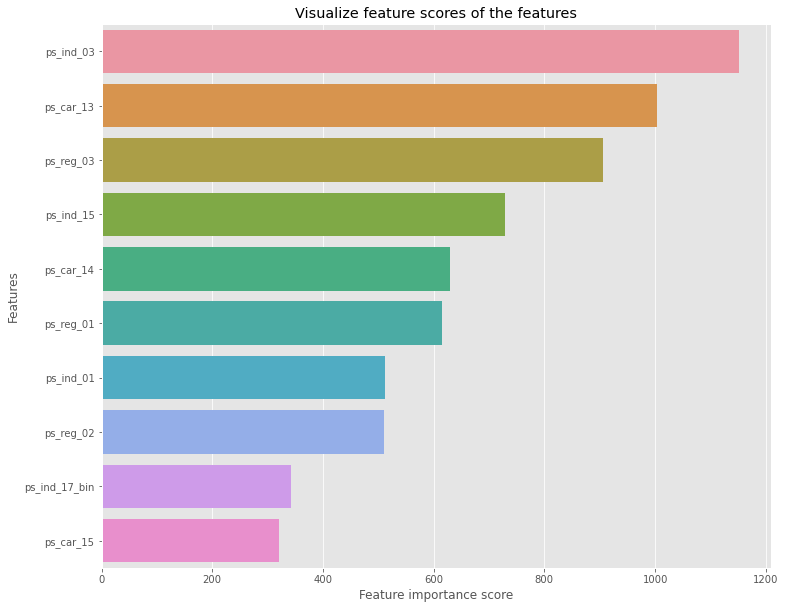

In [40]:
# view the feature scores
feature_scores = pd.Series(clf_LGBM.feature_importances_, index=X_train_.columns).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(x=feature_scores[0:10], y=feature_scores[0:10].index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores[0:10].index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

Il est intéressant de noter que pour le modèle LightGBM, les trois variables les plus importantes pour effectuer les prédictions sont les suivantes : ps_ind_03, ps_reg_03 et ps_car_13. 

Ces résultats soulignent l'importance de ces variables pour le modèle LightGBM dans la tâche de classification. 

#Conclusion 

In [41]:
print('AUC Regression Logistique: ', roc_auc_score(y_test, y_pred__Logistic_proba[:,1]))
print('AUC Random Forest: ', roc_auc_score(y_test, y_pred_RF_proba[:,1]))
print('AUC LightGBM: ', roc_auc_score(y_test, y_pred_lightgbm_proba[:,1]))

AUC Regression Logistique:  0.6283755131740453
AUC Random Forest:  0.6298385781975421
AUC LightGBM:  0.6412083584132896


D'après les résultats obtenus, nous pouvons tirer la conclusion suivante :

Parmi les trois modèles évalués, LightGBM a obtenu le meilleur résultat avec une Aire sous la courbe ROC (AUC) de 0.6412. Cela signifie que le modèle LightGBM a une meilleure capacité à distinguer entre les classes positives et négatives que les autres modèles.

La régression logistique a obtenu un AUC de 0.6283, ce qui est légèrement inférieur à celui du Random Forest qui est de 0.6290. Bien que la différence entre les performances de ces deux modèles soit faible, LightGBM a réussi à surpasser les deux autres en termes de performances prédictives.

En conclusion, pour cette tâche de classification, LightGBM se révèle être le modèle le plus performant parmi ceux testés, offrant une meilleure discrimination entre les classes cibles. Il serait donc préférable de choisir LightGBM pour de futurs projets nécessitant une prédiction précise dans des ensembles de données similaires. Cependant, il est toujours important de prendre en compte d'autres facteurs tels que la complexité du modèle, les ressources informatiques disponibles et la taille de l'ensemble de données avant de prendre une décision finale.

# Submission

In [43]:
sub = pd.DataFrame()
sub['id'] = X_test.index
sub['target'] = y_pred_lightgbm
sub.to_csv('submission.csv', index=False)